Мы владеем сетью магазинов, в которых продаются различные товары.  

Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине.  

Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж.  

Описание датасета:

Variable	Description  
- Item_Identifier	Id продукта  
- Item_Weight	Вес продукта  
- Item_Fat_Content	Содержание жира в продукте  
- Item_Visibility	%полок, отведенный под наш продукт в конкретном магазине  
- Item_Type	Категория продукта  
- Item_MRP	Максимальная цена продажи продукта  
- Outlet_Identifier	Идентификатор магазина  
- Outlet_Establishment_Year	Год открытия магазина  
- Outlet_Size	Площадь магазина  
- Outlet_Location_Type	Тип города, в котором расположен магазин  
- Outlet_Type	Признак является ли магазин продуктовым или супермаркетом  
- Item_Outlet_Sales	Продажи продукта в конкретном магазине. Именно ее и надо предсказывать  

В результате работы должен получиться:  
- Jupyter-ноутбук с моделью  
- Признаки, влияющие больше всего на уровень продаж  
- Датасет, если после ваших манипуляций он отличается от исходного;  
- Документ с обоснованием решения и краткими результатами: какие техники и почему использовали, что получили, что можно улучшить (можно в рамках jupyter notebook’а)

Баллы	Что надо сделать  
10	Провести EDA  
10	Обработать категориальные признаки   
10	Устранить пропущенные значения  
10	Изучить корреляцию признаков с данными о продажах  
10	Выбрать и обосновать метрику, на основе которой будем измерять качество полученной модели  
20	Построить и подобрать оптимальные параметры для любой линейной модели  
20	Построить и подобрать оптимальные параметры для любой нелинейной модели  
20	Провести стекинг нескольких моделей  
10	Оценить качество модели на отложенной выборке  
10	Выбрать топ 3 признака больше всего влияющие на объемы продаж  

Все шаги решения должны сопровождаться подробным описанием полученных результатов и обоснованием выбора того или иного шага!  
За отсутствие описания так же будут снижаться баллы.  

Максимальное доступное количество баллов - 130  
Для получения зачета надо набрать минимум 80 баллов  
Для получения зачета с отличием надо набрать минимум 120 баллов  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Провести EDA

In [3]:
# посмотрим глазами основные характеристики датасета

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe().T

count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

In [6]:
columns_cat = data.select_dtypes(object).columns
columns_digit = data.select_dtypes(exclude=object).columns

print(f'Количество категориальных переменных: {len(columns_cat)}')
print(f'Количество количественных переменных: {len(columns_digit)}')

Количество категориальных переменных: 7
Количество количественных переменных: 5


In [7]:
# всего в датасете 8523 записей
# среднее по целевому признаку составляет 2 181,29; при этом есть очень большо разброс - от 33,29 до 13 086,96.75 квантиль 3101

# есть странный min=0 у признака Item_Visibility, а может и не странный
# есть нулевые значения в признаках Item_Weight, Outlet_Size
# много категорильных переменных, необходимо с ними поработать

# Устранить пропущенные значения

In [8]:
# Item_Weight

In [9]:
data[data.Item_Weight.isna() == 1].count()
data[data.Item_Weight.isna() == 1]

# 1463 нулевых значения; 6113 ненулевых значения; 
# гипотезы:
# - это продукты, вес которых реально очень низок. Можно уставить нулевыи или заполнить отрицательным значением
# - значение на самом деле есть, но по какой-то причине отсутствуют. Необходимо проставить или предсказать значения признака

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [10]:
data[data.Item_Weight.isna() == 0]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[7060 rows x 12 columns]

In [11]:
x = data[data.Item_Weight.isna() == 1].Item_Type.value_counts()

In [12]:
y = data[data.Item_Weight.isna() == 0].Item_Type.value_counts()

In [13]:
vc = pd.merge(pd.DataFrame(y), pd.DataFrame(x), how='outer', left_index=True, right_index=True)

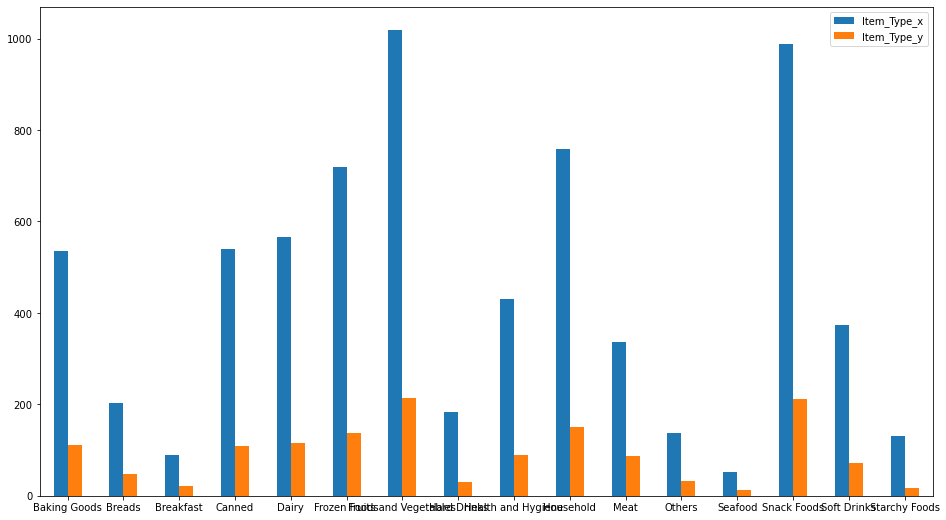

In [14]:
vc.plot.bar(rot=0)

In [15]:
# кардинального различия по группам продуктов между продуктами со значениями и без нет. 
# скорее всего вес у этих позиций какой-то все же есть, либо он просто менее имеющегося "минимума" 4,555 по признаку, но 
# утверждать это нельзя. 

# Можно пробовать заполнить нули через предсказания отдельной модели

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [17]:
# создадим копию датафрейма для работы с моделью

In [18]:
tmp_df = data.copy()

In [19]:
tmp_df_cat = tmp_df[columns_cat].astype(str)
tmp_df_digit = tmp_df[columns_digit]

In [20]:
# предварительно отделим категориальные переменные от количественных
# так как передать в модель сырые текстовые признаки нельзя, то используем LableEncoder для перевода текста в цифру.

In [21]:
le = LabelEncoder()

In [22]:
tmp_df_cat = tmp_df_cat.apply(le.fit_transform)

In [23]:
tmp_df = tmp_df_digit.join(tmp_df_cat)

In [24]:
# разобьем датасет на две части - по которой будем предсказывать вес и на которой будем обучаться. 
# Отдельно убираем признак Outlet_Size, так как в нем есть нули и мы хотим их предсказывать другой моделью. 

iw_null = tmp_df[tmp_df.Item_Weight.isna() == 1].drop(['Item_Weight','Outlet_Size'], axis=1)

iw_data = tmp_df[tmp_df.Item_Weight.isna() == 0].drop(['Item_Weight','Outlet_Size'], axis=1)
iw_data_target = tmp_df[tmp_df.Item_Weight.isna() == 0].Item_Weight

In [25]:
# отдельно разобьем "рабочие" данные на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test  = train_test_split(iw_data, iw_data_target, test_size=0.25, random_state=42)

In [26]:
# в качестве предсказательной модели возьмем RF из-за его лояльности к отсутствию OHE признаков и стабильной работы алгоритма. 
rf_iw = RandomForestRegressor(n_estimators=500,n_jobs=-1)

In [27]:
rf_iw.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [28]:
predictions_iw = rf_iw.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, predictions_iw))

# модель отработала; получили довольно низкий RMSE при средней по признаку 12,85. Предскажем реальные веса при помощи модели

2.6785582495561084

In [30]:
predictions_iw_real = rf_iw.predict(iw_null)

In [31]:
tmp_df.Item_Weight.loc[iw_null.index] = predictions_iw_real
data.Item_Weight.loc[iw_null.index] = predictions_iw_real

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
### построили модель RFRegressor`а для предсказания нулевых значений весов и заполнили их. 
# предположим, что это лучше, чем просто угадывать или заполнять нулями пустые значения. 

In [33]:
# Outlet_Size

In [34]:
data[data.Outlet_Size.isna() == 1].count()
data[data.Outlet_Size.isna() == 1]

# 2410 нулевых значения;
# гипотезы:
# - это островки, которые реально не имеют признака. Можно уставить нулевыи или заполнить отрицательным значением
# - значение на самом деле есть, но по какой-то причине отсутствуют. Необходимо предсказать значения признака

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
25             NCD06       13.000          Low Fat         0.099887   
28             FDE51        5.925          Regular         0.161467   
...              ...          ...              ...              ...   
8502           NCH43        8.420          Low Fat         0.070712   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
28                    Dairy   45.5086            OUT010   
...                     ...       ...               ...   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8509  Fruits and Vegetables  213.9902            OUT010   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
25                         2007         NaN               Tier 2   
28                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8502                       2002         NaN               Tier 2   
8508                       2002         NaN               Tier 2   
8509                       1998         NaN               Tier 3   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
28        Grocery Store           178.4344  
...                 ...                ...  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8509      Grocery Store           424.7804  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[2410 rows x 12 columns]

In [35]:
# поопробуем посмотреть различия по Outlet_Location_Type и Outlet_Type

In [36]:
x = data[data.Outlet_Size.isna() == 1].Outlet_Location_Type.value_counts()

In [37]:
y = data[data.Outlet_Size.isna() == 0].Outlet_Location_Type.value_counts()

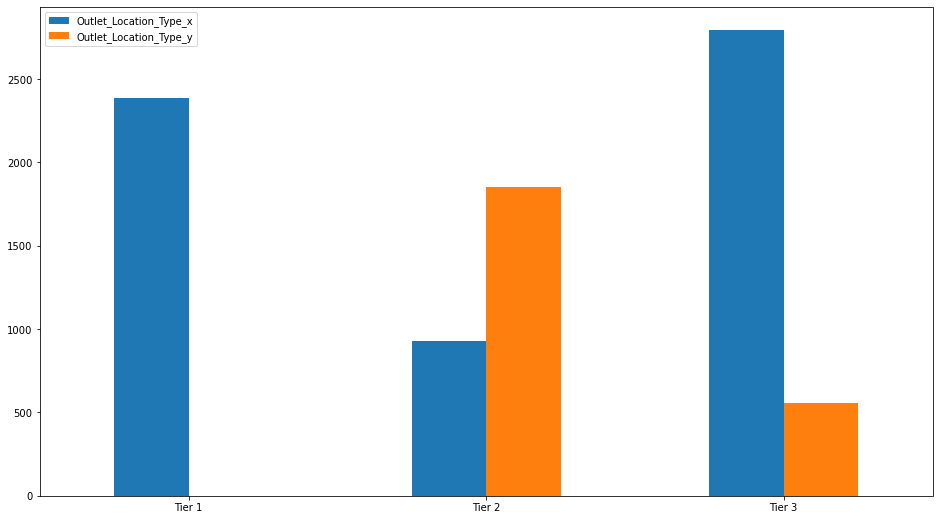

In [38]:
pd.merge(pd.DataFrame(y), pd.DataFrame(x), how='outer', left_index=True, right_index=True).plot.bar(rot=0)

In [39]:
x = data[data.Outlet_Size.isna() == 1].Outlet_Type.value_counts()

In [40]:
y = data[data.Outlet_Size.isna() == 0].Outlet_Type.value_counts()

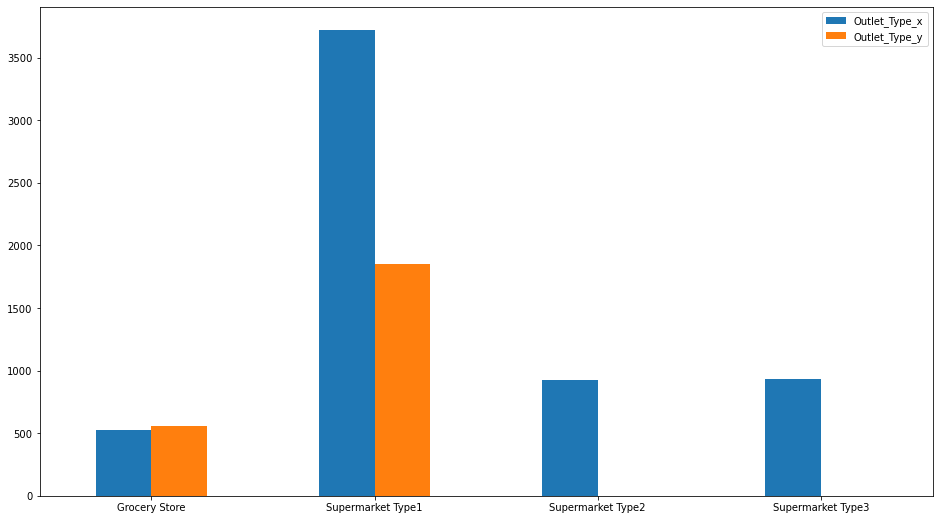

In [41]:
pd.merge(pd.DataFrame(y), pd.DataFrame(x), how='outer', left_index=True, right_index=True).plot.bar(rot=0)

In [42]:
### явно сказать, что отсутствующие признаки относятся к какому-то конкретному типу нельзя
# доволно интересно наличие только нулевых признаков в местах Tier 1, и магазинах типа2, типа3

# попробуем построить классификатор для определения этого признака
# тиакже воспользуемся моделью RF

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
os_null = tmp_df[tmp_df.Outlet_Size == 3].drop(['Item_Weight','Outlet_Size'], axis=1)

os_data = tmp_df[tmp_df.Outlet_Size != 3].drop(['Item_Weight','Outlet_Size'], axis=1)
os_data_target = tmp_df[tmp_df.Outlet_Size != 3].Outlet_Size

In [45]:
from sklearn.preprocessing import label_binarize

In [46]:
# для подсчета мультиклассовой метрики качества используем label_binarize на целевую переменную

os_data_target = label_binarize(os_data_target, classes=[0, 1, 2])
n_classes = os_data_target.shape[1]

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(os_data, os_data_target, test_size=0.25, random_state=42)

In [48]:
from sklearn.multiclass import OneVsRestClassifier

In [49]:
# для работы с несколькими классами применим OneVsRestClassifier+в качестве предсказывающей модели RF 

clf_os = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,n_jobs=-1))
y_score = clf_os.fit(X_train, y_train).predict_proba(X_test)

In [50]:
# нужно оценить получившиеся результаты, в качестве удобного и понятного средства оценки используем ROC AUC
# и ниже начались танцы с расчетом и визуализацией ROC_AUC для мультиклассовой классификации...

In [51]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from scipy import interp
from itertools import cycle

In [52]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

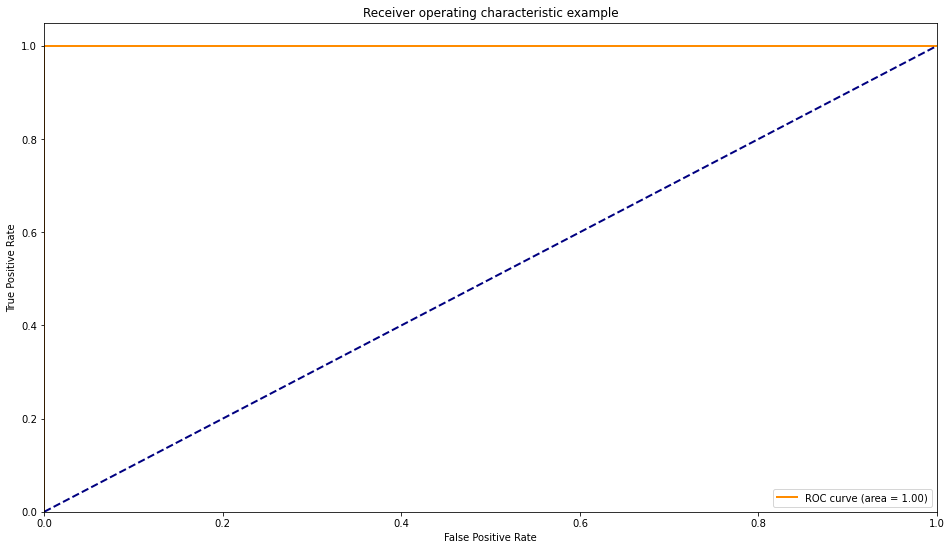

In [53]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<ipython-input-54-ca434529b813>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


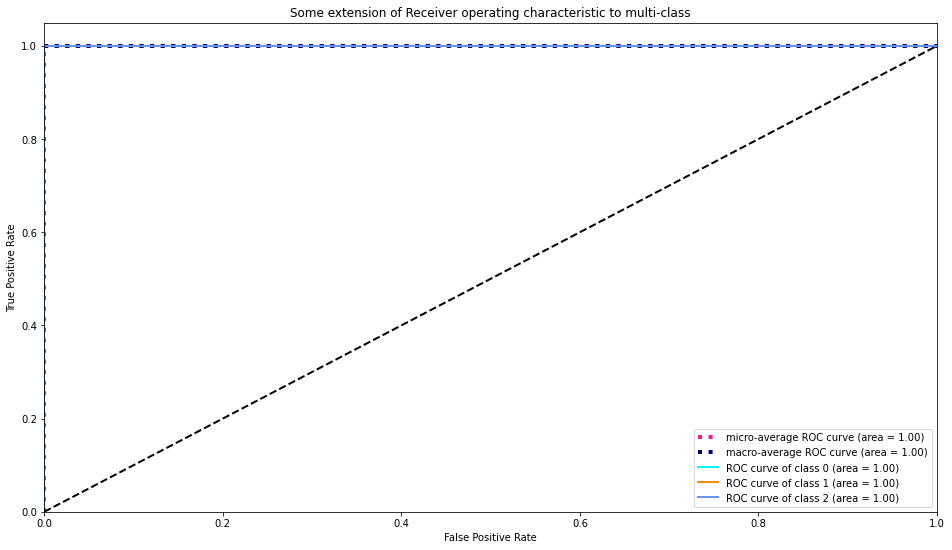

In [54]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [55]:
y_test == y_score

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [56]:
### либо модель поймала какую-то очевидную взаимосвязь, которую не увидел я,
### либо кривая ошибочная/переобученная

### в итоге решил эту модель для заполнения нулей; посчитал, что все же что-то найдено

In [57]:
predictions_os_real = np.argmax(clf_os.predict(os_null), axis=1)

In [58]:
tmp_df.Outlet_Size.loc[os_null.index] = predictions_os_real
data.Outlet_Size.loc[os_null.index] = predictions_os_real

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
# категорий мало, поэтому явно вернем их в изначальный текст

data.Outlet_Size = np.where(data['Outlet_Size'] == 0, 'High', 
                        np.where(data['Outlet_Size'] == 1, 'Medium', 
                        np.where(data['Outlet_Size'] == 2, 'Small', data['Outlet_Size'])))

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        High               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [62]:
# нулевые значения заполнены при помощи модели регрессора и модели классификатора
# возвращен оригинальный датасет с категориальными признаками

# Обработать количественные признаки

In [63]:
columns_digit

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [64]:
df_cont = data[columns_digit]

In [65]:
# большинство количественных признаков выглядит нормально, нулевых значений нет. Тем не менее, почти по каждому признаку 
# очень много уникальных значений. Это можно создать сложности для обучения модели. Попробуем округлить сотые 
# или тысячные как незначащие и посмотреть на изменения пространства признаков 

In [66]:
# Item_Weight
df_cont.Item_Weight.value_counts()

12.15000    86
17.60000    82
13.65000    77
11.80000    76
9.30000     68
            ..
14.61340     1
13.10781     1
12.07614     1
11.24185     1
8.41071      1
Name: Item_Weight, Length: 1878, dtype: int64

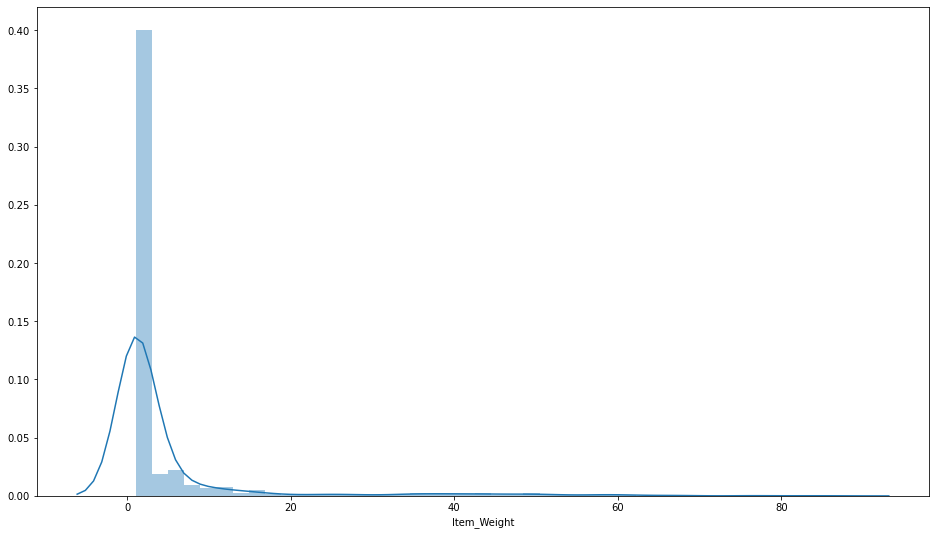

In [67]:
sns.distplot(df_cont.Item_Weight.value_counts())

In [68]:
df_cont[df_cont.Item_Weight < 10].Item_Weight.value_counts()

9.30000    68
9.80000    61
9.19500    56
9.50000    49
9.60000    49
           ..
7.04235     1
9.75302     1
9.62293     1
8.99124     1
9.11897     1
Name: Item_Weight, Length: 491, dtype: int64

In [69]:
# из-за точного веса с 5-м знаком после запятой получается очень большое количество уникальных признаков. 
# При этом при округлении их количество можно значитльно снизить. 

In [70]:
df_cont.Item_Weight = df_cont.Item_Weight.round(0)

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [71]:
# Item_Visibility
df_cont.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

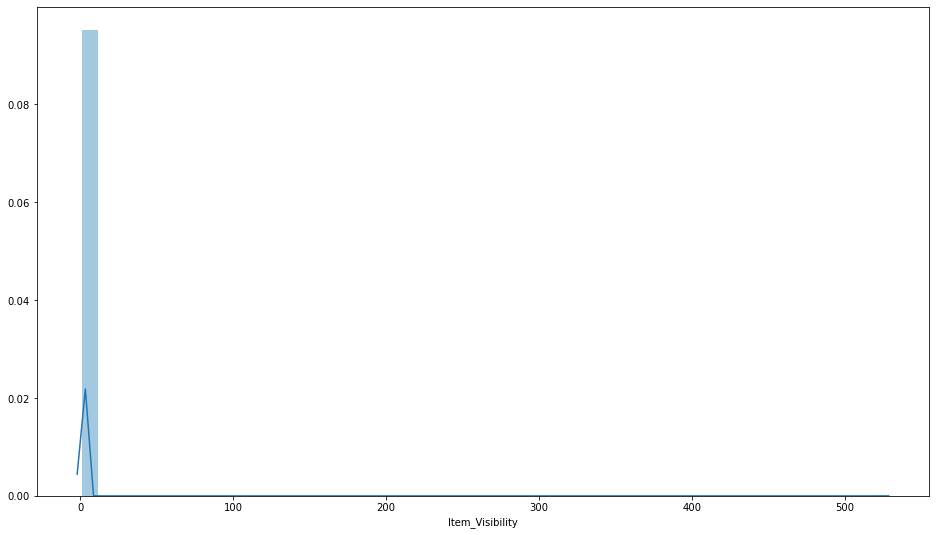

In [72]:
sns.distplot(df_cont.Item_Visibility.value_counts())

In [73]:
df_cont.Item_Visibility.round(2).value_counts()

0.03    911
0.04    850
0.02    812
0.05    684
0.06    574
0.01    566
0.07    542
0.08    533
0.00    532
0.09    400
0.10    350
0.12    292
0.11    288
0.13    242
0.14    230
0.16    167
0.15    139
0.17    133
0.18     86
0.19     45
0.21     26
0.20     19
0.22     14
0.24     14
0.23     12
0.29     12
0.25     11
0.30      9
0.27      8
0.28      8
0.26      6
0.31      5
0.33      2
0.32      1
Name: Item_Visibility, dtype: int64

In [74]:
df_cont.Item_Visibility = df_cont.Item_Visibility.round(2)
# предположим, что при планировании пространства третий и далее знаки после запятой в процентах излишни. 
# при помощи округления удается сузить пространство признака до 34 разновидностей

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
#Item_MRP
df_cont.Item_MRP.value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

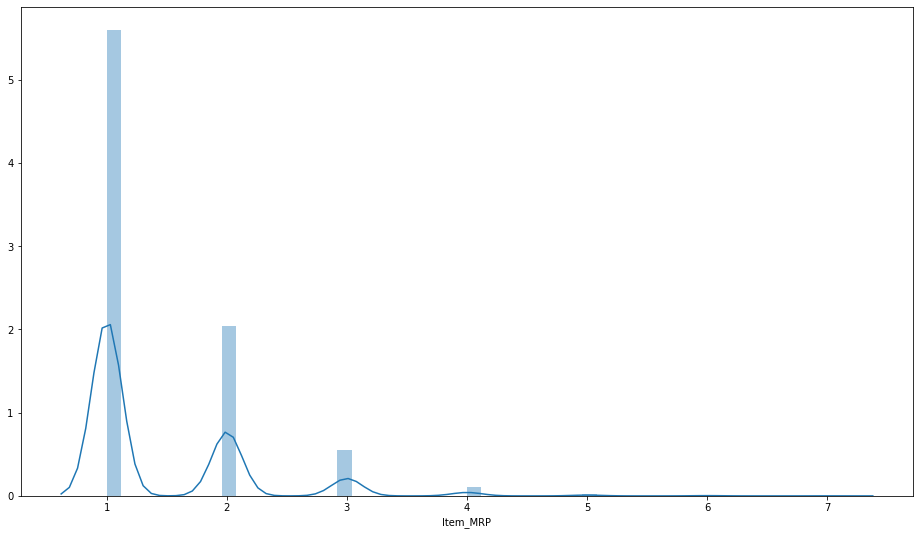

In [76]:
sns.distplot(df_cont.Item_MRP.value_counts())

In [77]:
df_cont.Item_MRP.round(0).value_counts()

197.0    76
122.0    76
178.0    75
110.0    69
121.0    68
         ..
68.0      2
31.0      2
67.0      2
138.0     1
71.0      1
Name: Item_MRP, Length: 229, dtype: int64

In [78]:
df_cont.Item_MRP = df_cont.Item_MRP.round(0)

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
# Outlet_Establishment_Year
df_cont.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

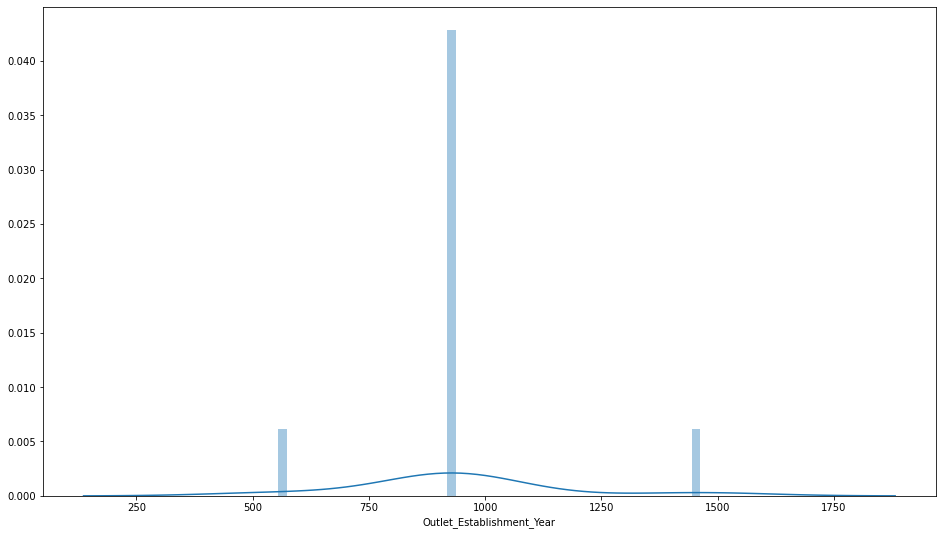

In [80]:
sns.distplot(df_cont.Outlet_Establishment_Year.value_counts())

In [81]:
# значений немного, логически они выглядят нормальными. Не будем трогать признак

In [82]:
# Item_Outlet_Sales
df_cont.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

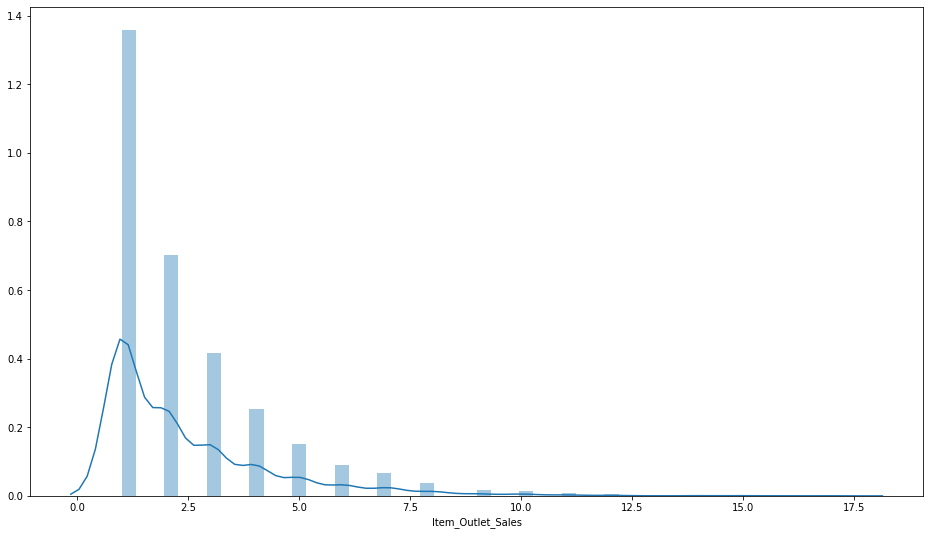

In [83]:
sns.distplot(df_cont.Item_Outlet_Sales.value_counts())

In [84]:
# мы не знаем в каких единицах дана информация, поэтому значения после запятой в продажах могут быть значительны. 
# так как это наша целевая переменная, то стараемся сохранить максимум информации и не производить трансформацию.

In [85]:
df_cont

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0             9.0             0.02     250.0                       1999   
1             6.0             0.02      48.0                       2009   
2            18.0             0.02     142.0                       1999   
3            19.0             0.00     182.0                       1998   
4             9.0             0.00      54.0                       1987   
...           ...              ...       ...                        ...   
8518          7.0             0.06     215.0                       1987   
8519          8.0             0.05     108.0                       2002   
8520         11.0             0.04      85.0                       2004   
8521          7.0             0.15     103.0                       2009   
8522         15.0             0.04      75.0                       1997   

      Item_Outlet_Sales  
0             3735.1380  
1              443.4228  
2             2097.2700  
3              732.3800  
4              994.7052  
...                 ...  
8518          2778.3834  
8519           549.2850  
8520          1193.1136  
8521          1845.5976  
8522           765.6700  

[8523 rows x 5 columns]

# Обработать категориальные признаки

In [86]:
columns_cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [88]:
data.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCJ30     9
FDV60     9
NCL31     9
         ..
FDO33     1
FDN52     1
FDC23     1
FDK57     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [89]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [90]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [91]:
data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [92]:
data.Outlet_Size.value_counts()

Small     4216
Medium    2793
High      1514
Name: Outlet_Size, dtype: int64

In [93]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [94]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [95]:
# с виду с признаками все нормально. Реально большое количество разновидностей в признаке Item_Identifier, но какой-то
# бренд/продукт реально могут продаваться лучше других. Поэтому манипуляции с этим признаком произодвить также не стал. 

# Для деревьев можно сделать только OneHotEncoding, но для оценки также другими алгоритмами необходимо при помощи 
# get dummies преобразуем категории

In [96]:
df_cat = pd.get_dummies(data[columns_cat])

# Изучить корреляцию признаков с данными о продажах

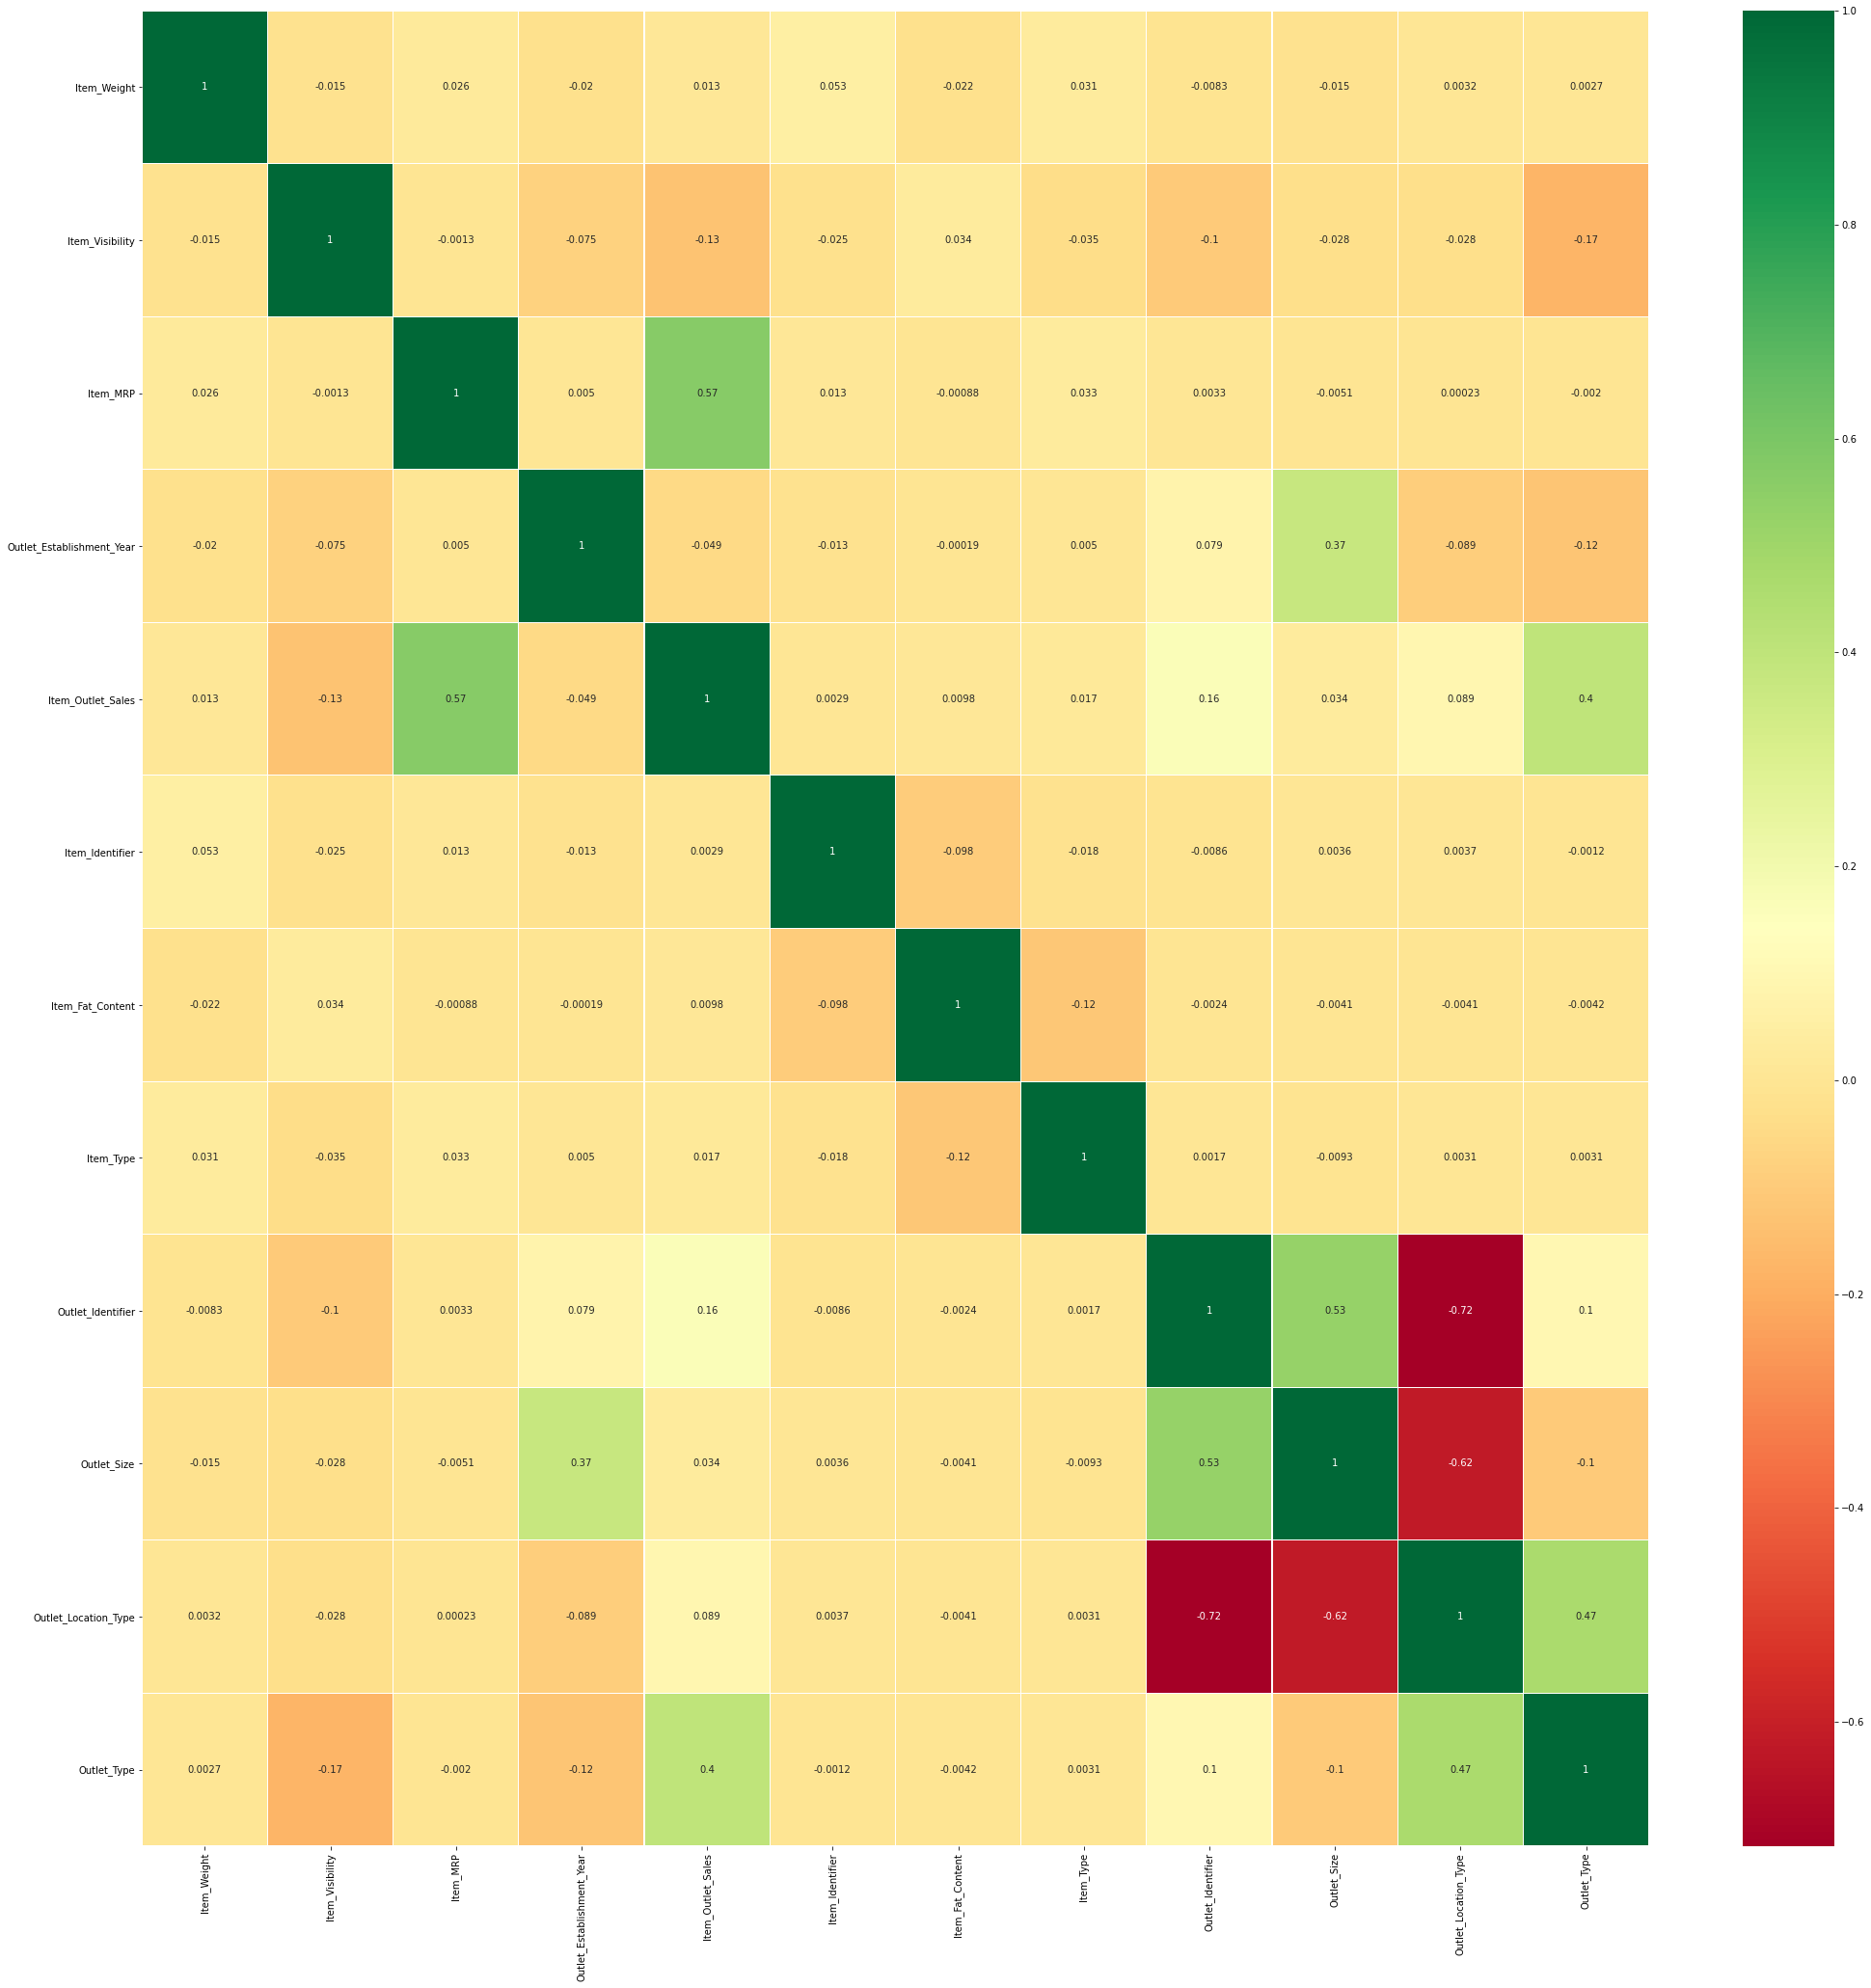

In [97]:
# для оценки корреляции между признаками используем визуализированную матрицу корреляций (heatmap)
# в качестве данных возьмем датасет с предыдущего шага до get_dummies или ohe признаков. 

sns.heatmap(tmp_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(35,35)
plt.show()

In [98]:
import pandas_profiling

In [99]:
pandas_profiling.ProfileReport(tmp_df)

In [100]:
# Коррекляции в данных есть. Между целевой переменной и item mrp; между другими пермененными. 
# Тем не менее, некоторые признаки действительно логически пересекаются, но не взаимоисключаемы. Нельзя сказатm, 
# что какой-то признак явно вычисляется через другие или взаимозависимы. Profilereport также не сигнализиует о явных
# корреляциях между признаками. Оставим все признаки. 

In [101]:
df = df_cont.join(df_cat)

In [102]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0          9.0             0.02     250.0                       1999   
1          6.0             0.02      48.0                       2009   
2         18.0             0.02     142.0                       1999   
3         19.0             0.00     182.0                       1998   
4          9.0             0.00      54.0                       1987   

   Item_Outlet_Sales  Item_Identifier_DRA12  Item_Identifier_DRA24  \
0          3735.1380                      0                      0   
1           443.4228                      0                      0   
2          2097.2700                      0                      0   
3           732.3800                      0                      0   
4           994.7052                      0                      0   

   Item_Identifier_DRA59  Item_Identifier_DRB01  Item_Identifier_DRB13  ...  \
0                      0                      0                      0  ...   
1                      0                      0                      0  ...   
2                      0                      0                      0  ...   
3                      0                      0                      0  ...   
4                      0                      0                      0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                 0                   1                  0   
1                 0                   1                  0   
2                 0                   1                  0   
3                 1                   0                  0   
4                 1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 1605 columns]

In [103]:
df.shape

(8523, 1605)

In [104]:
# получили итоговый df для работы с моделями предсказаниями

### Выбрать и обосновать метрику, на основе которой будем измерять качество полученной модели

In [105]:
# Решаем задачу регрессии, поэтому можно для оценки выбирать один из показателей оценки отклонения остатков - MAE, MSE, RMSE. 
# Мне хотелось бы избежать крупных ошибок модели, поэтому в качестве основного используем показатель RMSE.

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
# выделили выборку для обучения, выбрали целевую переменную

X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [108]:
# разобьем данные на отложенную выборку и обучающую
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# отдельно обучающую выборку разобьем на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Построить и подобрать оптимальные параметры для любой линейной модели

In [110]:
# для подбора оптимальных параметров (лучшей комбинации) используем GridSearchCV
# итоговое поле признаков достаточно велико. Какие-то возможно не являются значимыми, поэтому в качестве линейной модели 
# используем Lasso регрессию с регуляризацией, которая зануляет коэффициенты перед наименее важными переменными

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
from sklearn.linear_model import Lasso

In [113]:
params_Lasso = {
    'fit_intercept' : [False, True],
    'normalize' : [False, True]
    }

In [114]:
grid_Lasso = GridSearchCV(Lasso(), param_grid=params_Lasso, cv=5, scoring='neg_mean_squared_error')
grid_Lasso.fit(X_train, y_train)

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2669454791.945404, tolerance: 3446803.2925180644
  model = cd_fast.enet_coordinate_descent(
c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2565079134.786881, tolerance: 3406767.8290331075
  model = cd_fast.enet_coordinate_descent(
c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745375622.6727533, tolerance: 3468694.967246948
  model = cd_fast.enet_coordinate_descent(
c:\users

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'fit_intercept': [False, True],
                         'normalize': [False, True]},
             scoring='neg_mean_squared_error')

In [115]:
print(grid_Lasso.best_params_)
print('RMSE: {}'.format(np.sqrt(np.abs(grid_Lasso.best_score_))))

{'fit_intercept': False, 'normalize': False}
RMSE: 1146.7258422423313


In [116]:
# что-то получилось. Простое среднее по признаку 2181.28, наша ошибка значительно правило меньше. Посмотрим другие модели. 

# Построить и подобрать оптимальные параметры для любой нелинейной модели

In [117]:
# в качестве нелинейной модели я выбрал SVR из-за возможности попробовать разные ядра и попытаться найти наилучшее

In [118]:
from sklearn.svm import SVR

In [119]:
params_svr = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [120]:
grid_svr = GridSearchCV(SVR(), param_grid=params_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [121]:
print(grid_svr.best_params_)
print('RMSE: {}'.format(np.sqrt(np.abs(grid_svr.best_score_))))

{'kernel': 'linear'}
RMSE: 1246.6462925089818


In [122]:
# результат подбора SVR параметров - линейное ядро, отсюда похожая оценки работа модели. Правда нюанс в том, что 
# из ряда нелинейных ядер GS все равно выбрал линейное. Можно запустить RandomForest или KNN. 

# Провести стекинг нескольких моделей

In [123]:
# для реализации стекинга используем штатный алгоритм StackingRegressor и наполним его LR, SVR, KNN моделями, в качестве 
# решающего применим RandomForestRegressor

In [124]:
from sklearn.ensemble import StackingRegressor

In [125]:
# from sklearn.linear_model import LinearRegression

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
from sklearn.neighbors import KNeighborsRegressor

In [128]:
classifier = StackingRegressor(
    [
#         ('lr', LinearRegression()),
        ('lasso', Lasso(fit_intercept=False, normalize=False)),
        ('svm', SVR(kernel='linear')),
        ('knn',KNeighborsRegressor(n_jobs=-1)),
        ('rfr', RandomForestRegressor(n_estimators=100, n_jobs=-1)),
    ],
RandomForestRegressor())

In [129]:
classifier.fit(X_train, y_train)

c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3125966006.7431784, tolerance: 4246619.834864532
  model = cd_fast.enet_coordinate_descent(
c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2669454791.945404, tolerance: 3446803.2925180644
  model = cd_fast.enet_coordinate_descent(
c:\users\frenzzzzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2565079134.786881, tolerance: 3406767.8290331075
  model = cd_fast.enet_coordinate_descent(
c:\user

StackingRegressor(estimators=[('lasso', Lasso(fit_intercept=False)),
                              ('svm', SVR(kernel='linear')),
                              ('knn', KNeighborsRegressor(n_jobs=-1)),
                              ('rfr', RandomForestRegressor(n_jobs=-1))],
                  final_estimator=RandomForestRegressor())

In [130]:
# y_pred_lr = classifier.named_estimators_['lr'].predict(X_test)
y_pred_lasso = classifier.named_estimators_['lasso'].predict(X_test)
y_pred_svm = classifier.named_estimators_['svm'].predict(X_test)
y_pred_knn = classifier.named_estimators_['knn'].predict(X_test)
y_pred_rfr = classifier.named_estimators_['rfr'].predict(X_test)

In [131]:
y_pred = classifier.predict(X_test)

In [132]:
# print("RMSE lr: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)),2))
print("RMSE lasso: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),2))
print("RMSE svm: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_svm)),2))
print("RMSE knn: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_knn)),2))
print("RMSE rfr: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_rfr)),2))

print("RMSE classifier: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

RMSE lasso: 	 1173.34
RMSE svm: 	 1257.62
RMSE knn: 	 1268.85
RMSE rfr: 	 1181.09
RMSE classifier: 	 1179.9


In [133]:
# лучший результат среди моделей по-прежнему показывает Lasso, итоговая работа стакинга усредняет этот показатель. 

# Оценить качество модели на отложенной выборке

In [134]:
# предскажем значения на отложенной выборке и оценим метрику качестве

# y_pred_val_lr = classifier.named_estimators_['lr'].predict(X_val)
y_pred_val_lasso = classifier.named_estimators_['lasso'].predict(X_val)
y_pred_val_svm = classifier.named_estimators_['svm'].predict(X_val)
y_pred_val_knn = classifier.named_estimators_['knn'].predict(X_val)
y_pred_val_rfr = classifier.named_estimators_['rfr'].predict(X_val)

In [135]:
y_pred_val = classifier.predict(X_val)

In [136]:
# print("RMSE lr: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val_lr)),2))
print("RMSE lasso: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val_lasso)),2))
print("RMSE svm: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val_svm)),2))
print("RMSE knn: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val_knn)),2))
print("RMSE rfr: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val_rfr)),2))

print("RMSE classifier: \t", round(np.sqrt(mean_squared_error(y_val, y_pred_val)),2))

RMSE lasso: 	 1073.03
RMSE svm: 	 1158.32
RMSE knn: 	 1213.95
RMSE rfr: 	 1092.83
RMSE classifier: 	 1108.74


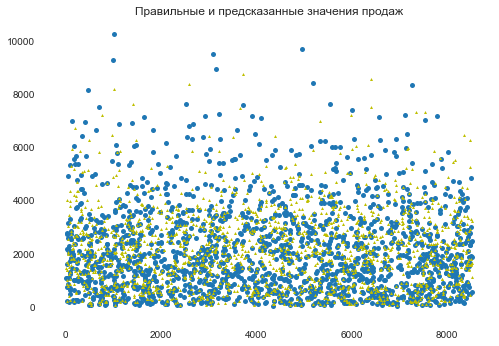

In [137]:
plt.plot(y_val.index, y_val, 'o', markersize = 5)
plt.plot(y_val.index, y_pred_val, 'y^', markersize = 3)
plt.title('Правильные и предсказанные значения продаж')
plt.show()

In [138]:
# наибольшее влияние при выборе итогового предсказания оказывает KNN, при этом по показателю ошибки !!!LinearRegression!!!
# показывает просто катастрофу RMSE измиряется в миллионах. 
# Изменение/донастройка/замена этой модели из стекинга может улучшить или значительно изменить качество предсказания

In [139]:
# после замены обычной Linearregression на lasso результат улучшился. Теперь наибольшее значение при принятии решения стекинг
# rf отдает Lasso регрессии. 

# на графике предсказаний можно увидеть, что в самые крупные предсказания модель не попадает, но неплохо отрабатывает 
# средние и маленькие предсказания продаж. 

# При этом на отложенной выборке модель отработала с лучшей оценкой, чем на тестовой во время обучения. 

''

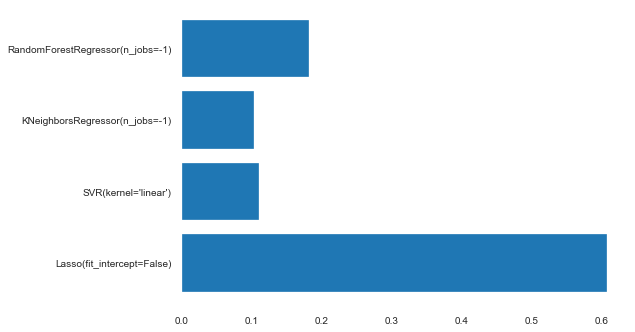

In [140]:
plt.barh(np.arange(len(classifier.final_estimator_.feature_importances_)),
                 classifier.final_estimator_.feature_importances_)
plt.yticks(np.arange(len(classifier.final_estimator_.feature_importances_)),classifier.estimators_)
''

# Выбрать топ 3 признака больше всего влияющие на объемы продаж

In [141]:
# Пройдем по коэффициентам Lassoo-регрессии и посмотрим, каким признакам модель придала наибольший вес, а какие занулила. 

coefs = {}

for a, b in zip(X_val.columns, classifier.named_estimators_['lasso'].coef_):
    coefs[a] = b

In [142]:
{k: v for k, v in sorted(coefs.items(), key=lambda item: item[1], reverse=True)}

{'Outlet_Identifier_OUT027': 1480.4405170668713,
 'Item_Identifier_FDA15': 792.2631123886273,
 'Item_Identifier_FDN58': 731.1397029364189,
 'Item_Identifier_FDY25': 726.1573930278704,
 'Item_Identifier_FDD44': 705.0464768888542,
 'Item_Identifier_NCE42': 680.527644690926,
 'Item_Identifier_FDW56': 680.5078061824703,
 'Item_Identifier_DRF36': 648.2582185557474,
 'Item_Identifier_FDI50': 640.6810271455491,
 'Item_Identifier_FDQ37': 600.8357527340361,
 'Item_Identifier_DRL01': 538.549727646005,
 'Item_Identifier_FDJ15': 466.82196759615454,
 'Item_Identifier_FDV57': 438.37765467941864,
 'Item_Identifier_FDR45': 418.38199091696515,
 'Item_Identifier_NCZ54': 409.5064994898632,
 'Item_Identifier_NCZ18': 321.4442790396941,
 'Item_Identifier_FDC47': 300.27235259719237,
 'Item_Identifier_FDE36': 287.2825661293088,
 'Item_Identifier_FDU51': 286.1361995602344,
 'Item_Identifier_FDJ21': 233.22839404127126,
 'Item_Identifier_FDG45': 229.88437213603734,
 'Item_Identifier_FDQ52': 198.10619761544004,
 

In [143]:
{k: v for k, v in sorted(coefs.items(), key=lambda item: item[1])}

{'Outlet_Type_Grocery Store': -1839.223606821812,
 'Item_Identifier_FDH10': -508.34409468307786,
 'Item_Identifier_NCH43': -502.8581592373983,
 'Item_Identifier_NCC43': -278.61159864070595,
 'Item_Identifier_NCH06': -216.57076458739266,
 'Item_Identifier_FDJ22': -212.49354467656278,
 'Item_Identifier_DRJ01': -197.88549948071196,
 'Item_Identifier_DRL49': -167.2439151661725,
 'Outlet_Identifier_OUT018': -165.728715582389,
 'Outlet_Identifier_OUT045': -143.7974193185515,
 'Item_Identifier_DRK59': -135.57946780238626,
 'Outlet_Identifier_OUT046': -125.77749627460783,
 'Item_Identifier_FDQ03': -115.83545591383404,
 'Item_Identifier_FDS13': -112.42135661771718,
 'Item_Identifier_NCB31': -105.78192951566719,
 'Item_Identifier_FDX20': -98.00783609009808,
 'Item_Type_Dairy': -81.91659994485555,
 'Item_Type_Baking Goods': -74.50608912483541,
 'Item_Fat_Content_LF': -67.27883375572839,
 'Item_Identifier_FDP28': -65.07041963045738,
 'Item_Type_Soft Drinks': -41.83659139454135,
 'Item_Type_Health 

In [144]:
#1 Outlet_Type_Grocery Store: -1839.20 - тип "бакалея" выявлен как очень сильный фактор;

#2 Outlet_Identifier_OUT027: 1480.23 - выбран определенный магазин

#3 Item_Identifier_FDA15: 792.15 - выбран определенный товар

In [145]:
# data[data.Outlet_Type == 'Grocery Store']
# data[data.Item_Identifier == 'FDA15']
# data[data.Item_Identifier == 'FDN58']

In [146]:
# так как у нас SVM Linear Kernel, то схожим принципом можем посмотреть его коэффициенты

In [147]:
svm_coef = pd.Series(classifier.named_estimators_['svm'].coef_[0], index = X_val.columns)

In [148]:
svm_coef.abs().sort_values(ascending = False)[:10]

Outlet_Type_Grocery Store        435.692001
Outlet_Type_Supermarket Type1    229.423665
Outlet_Type_Supermarket Type3    224.544233
Outlet_Identifier_OUT027         224.544233
Outlet_Identifier_OUT019         222.214088
Outlet_Size_Medium               214.907190
Outlet_Identifier_OUT010         213.477913
Outlet_Size_High                 164.926171
Outlet_Location_Type_Tier 1      139.612639
Outlet_Location_Type_Tier 2      101.270474
dtype: float64

In [149]:
# в top-4 коэффициентов svm входят два уже виденных нами признаков - Outlet_Type_Grocery Store, Outlet_Identifier_OUT027

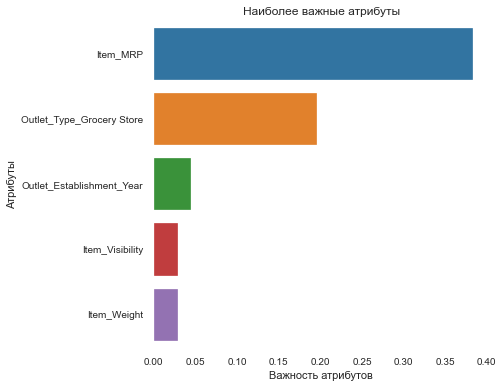

In [154]:
headers = list(X_val.columns.values)

feature_imp = pd.Series(classifier.named_estimators_['rfr'].feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [155]:
# при этом по мнению RandomForest`а наиболее важными признаками выступают Item_MRP, Outlet_Type_Grocery Store, год основания.

In [150]:
# Итого выбираем: Outlet_Type_Grocery Store, Outlet_Identifier_OUT027 + т.к. Lasso наиболее важна при принятии 
# решения, то третий признак - Item_Identifier_FDA15